About Dataset Context-

Problem Statement-

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

Content Attributes-

People

ID: Customer's unique identifier
Year_Birth: Customer's birth year
Education: Customer's education level
Marital_Status: Customer's marital status
Income: Customer's yearly household income
Kidhome: Number of children in customer's household
Teenhome: Number of teenagers in customer's household
Dt_Customer: Date of customer's enrollment with the company
Recency: Number of days since customer's last purchase
Complain: 1 if the customer complained in the last 2 years, 0 otherwise
Products

MntWines: Amount spent on wine in last 2 years
MntFruits: Amount spent on fruits in last 2 years
MntMeatProducts: Amount spent on meat in last 2 years
MntFishProducts: Amount spent on fish in last 2 years
MntSweetProducts: Amount spent on sweets in last 2 years
MntGoldProds: Amount spent on gold in last 2 years
Promotion

NumDealsPurchases: Number of purchases made with a discount
AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
Place

NumWebPurchases: Number of purchases made through the company’s website
NumCatalogPurchases: Number of purchases made using a catalogue
NumStorePurchases: Number of purchases made directly in stores
NumWebVisitsMonth: Number of visits to company’s website in the last month
Target-
Need to perform clustering to summarize customer segments.

In [99]:
# Import python modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, normalize, LabelEncoder
import sklearn.utils
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from matplotlib import rcParams
from sklearn.manifold import TSNE

In [144]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/marketing_campaign.csv', delimiter="\t")
print(df)

         ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  04-09-2012       58       635  ...            

In [101]:
type(df)
df.shape

(2240, 29)

In [102]:
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [103]:
df.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count      2240.000000  ...        2240.000000   2240.000000   2240.000000   
mean         37.525446  ...           5.316518      0.072768      0.074554   
std          54.628979  ...           2.426645      0.259813      0.262728   
min           0.000000  ...           0.000000      0.000000      0.000000   
25%           3.000000  ...           3.000000      0.000000      0.000000   
50%          12.000000  ...           6.000000      0.000000      0.000000   
75%          50.000000  ...           7.000000      0.000000      0.000000   
max         259.000000  ...          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2240.000000   2240.000000   2240.000000  2240.000000         2240.0   
mean       0.072768      0.064286      0.013393     0.009375            3.0   
std        0.259813      0.245316      0.114976     0.096391            0.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   

       Z_Revenue     Response  
count     2240.0  2240.000000  
mean        11.0     0.149107  
std          0.0     0.356274  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  

[8 rows x 26 columns]

In [104]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [106]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [145]:
# Dropping the 24 null points as it is very small in numbers when compared to total population count.
df=df.dropna()
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [108]:
type(df)
df.shape

(2216, 29)

In [109]:
df.describe().T

count          mean           std     min       25%  \
ID                   2216.0   5588.353339   3249.376275     0.0   2814.75   
Year_Birth           2216.0   1968.820397     11.985554  1893.0   1959.00   
Income               2216.0  52247.251354  25173.076661  1730.0  35303.00   
Kidhome              2216.0      0.441787      0.536896     0.0      0.00   
Teenhome             2216.0      0.505415      0.544181     0.0      0.00   
Recency              2216.0     49.012635     28.948352     0.0     24.00   
MntWines             2216.0    305.091606    337.327920     0.0     24.00   
MntFruits            2216.0     26.356047     39.793917     0.0      2.00   
MntMeatProducts      2216.0    166.995939    224.283273     0.0     16.00   
MntFishProducts      2216.0     37.637635     54.752082     0.0      3.00   
MntSweetProducts     2216.0     27.028881     41.072046     0.0      1.00   
MntGoldProds         2216.0     43.965253     51.815414     0.0      9.00   
NumDealsPurchases    2216.0      2.323556      1.923716     0.0      1.00   
NumWebPurchases      2216.0      4.085289      2.740951     0.0      2.00   
NumCatalogPurchases  2216.0      2.671029      2.926734     0.0      0.00   
NumStorePurchases    2216.0      5.800993      3.250785     0.0      3.00   
NumWebVisitsMonth    2216.0      5.319043      2.425359     0.0      3.00   
AcceptedCmp3         2216.0      0.073556      0.261106     0.0      0.00   
AcceptedCmp4         2216.0      0.074007      0.261842     0.0      0.00   
AcceptedCmp5         2216.0      0.073105      0.260367     0.0      0.00   
AcceptedCmp1         2216.0      0.064079      0.244950     0.0      0.00   
AcceptedCmp2         2216.0      0.013538      0.115588     0.0      0.00   
Complain             2216.0      0.009477      0.096907     0.0      0.00   
Z_CostContact        2216.0      3.000000      0.000000     3.0      3.00   
Z_Revenue            2216.0     11.000000      0.000000    11.0     11.00   
Response             2216.0      0.150271      0.357417     0.0      0.00   

                         50%       75%       max  
ID                    5458.5   8421.75   11191.0  
Year_Birth            1970.0   1977.00    1996.0  
Income               51381.5  68522.00  666666.0  
Kidhome                  0.0      1.00       2.0  
Teenhome                 0.0      1.00       2.0  
Recency                 49.0     74.00      99.0  
MntWines               174.5    505.00    1493.0  
MntFruits                8.0     33.00     199.0  
MntMeatProducts         68.0    232.25    1725.0  
MntFishProducts         12.0     50.00     259.0  
MntSweetProducts         8.0     33.00     262.0  
MntGoldProds            24.5     56.00     321.0  
NumDealsPurchases        2.0      3.00      15.0  
NumWebPurchases          4.0      6.00      27.0  
NumCatalogPurchases      2.0      4.00      28.0  
NumStorePurchases        5.0      8.00      13.0  
NumWebVisitsMonth        6.0      7.00      20.0  
AcceptedCmp3             0.0      0.00       1.0  
AcceptedCmp4             0.0      0.00       1.0  
AcceptedCmp5             0.0      0.00       1.0  
AcceptedCmp1             0.0      0.00       1.0  
AcceptedCmp2             0.0      0.00       1.0  
Complain                 0.0      0.00       1.0  
Z_CostContact            3.0      3.00       3.0  
Z_Revenue               11.0     11.00      11.0  
Response                 0.0      0.00       1.0

In [110]:
df.duplicated().sum()

0

In [146]:
df['Income'] = df['Income'].astype(int)

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2216 non-null   int64 
 1   Year_Birth           2216 non-null   int64 
 2   Education            2216 non-null   object
 3   Marital_Status       2216 non-null   object
 4   Income               2216 non-null   int64 
 5   Kidhome              2216 non-null   int64 
 6   Teenhome             2216 non-null   int64 
 7   Dt_Customer          2216 non-null   object
 8   Recency              2216 non-null   int64 
 9   MntWines             2216 non-null   int64 
 10  MntFruits            2216 non-null   int64 
 11  MntMeatProducts      2216 non-null   int64 
 12  MntFishProducts      2216 non-null   int64 
 13  MntSweetProducts     2216 non-null   int64 
 14  MntGoldProds         2216 non-null   int64 
 15  NumDealsPurchases    2216 non-null   int64 
 16  NumWebPurch

In [147]:
df.drop('ID', axis = 1, inplace= True)
df.head()

Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
0        1957  Graduation         Single   58138        0         0   
1        1954  Graduation         Single   46344        1         1   
2        1965  Graduation       Together   71613        0         0   
3        1984  Graduation       Together   26646        1         0   
4        1981         PhD        Married   58293        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  ...  NumWebVisitsMonth  \
0  04-09-2012       58       635         88  ...                  7   
1  08-03-2014       38        11          1  ...                  5   
2  21-08-2013       26       426         49  ...                  4   
3  10-02-2014       26        11          4  ...                  6   
4  19-01-2014       94       173         43  ...                  5   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   Complain  Z_CostContact  Z_Revenue  Response  
0         0              3         11         1  
1         0              3         11         0  
2         0              3         11         0  
3         0              3         11         0  
4         0              3         11         0  

[5 rows x 28 columns]

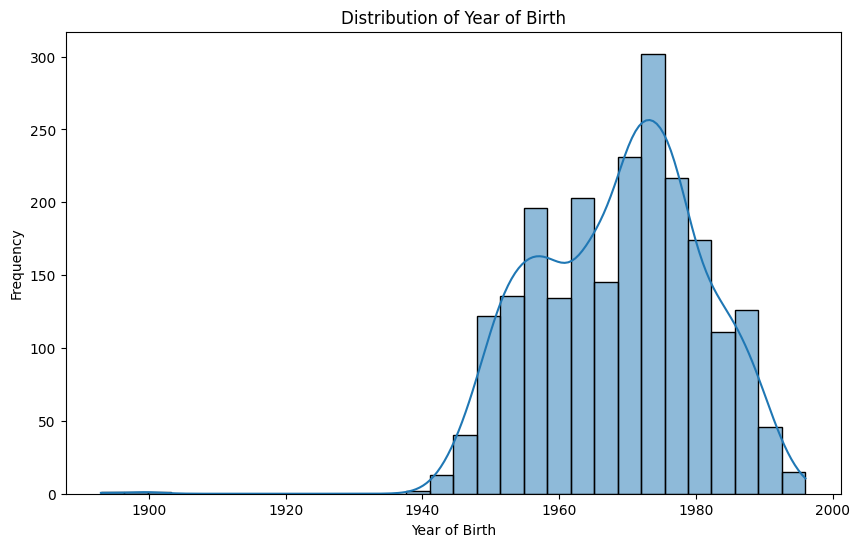

In [114]:
# Distribution of Year_Birth
plt.figure(figsize=(10, 6))
sns.histplot(df['Year_Birth'], kde=True, bins=30)
plt.title('Distribution of Year of Birth')
plt.xlabel('Year of Birth')
plt.ylabel('Frequency')
plt.show()

The majority of customers are from the birth year of 1950 to 1980 which tells customers product preferences would be of family orientation like Food, Clothes, Beverages and Recreation.

<ipython-input-115-56ff169290c7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x='Marital_Status', data=df, palette='viridis')


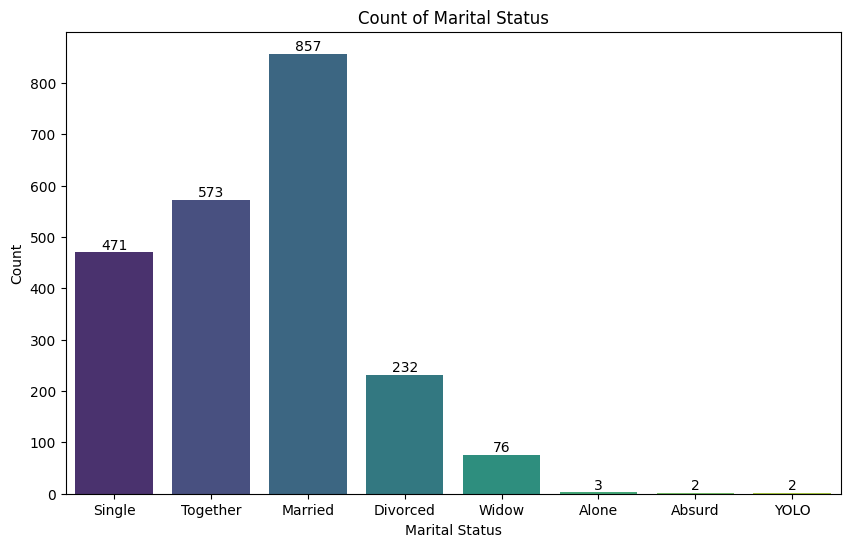

In [115]:
# Count plot of Marital_Status
plt.figure(figsize=(10, 6))
ax=sns.countplot(x='Marital_Status', data=df, palette='viridis')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

Text(0.5, 1.0, 'Recency')

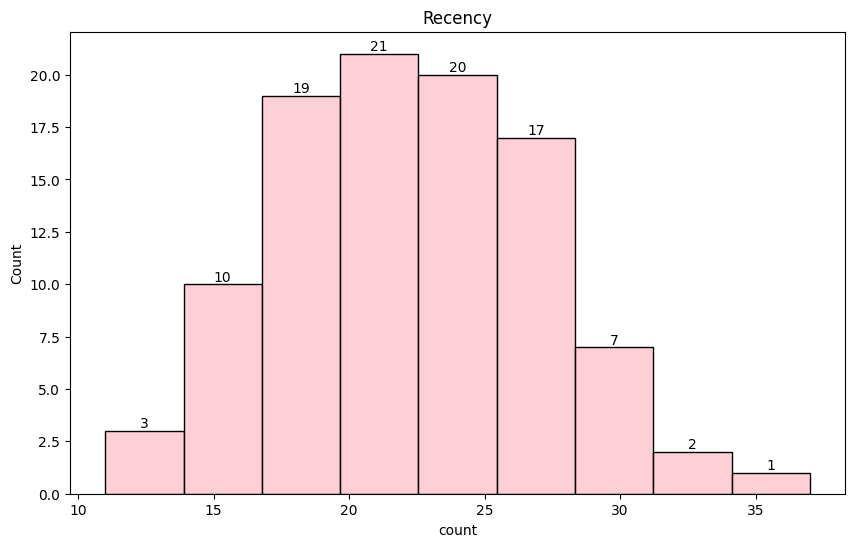

In [116]:
# Histogram for Recency

value_counts = df['Recency'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10, 6))

ax=sns.histplot(value_counts,color='pink')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Recency')

We can understand the customers are visiting the stores monthly once on an average where the gap between visits are 20-25 days.

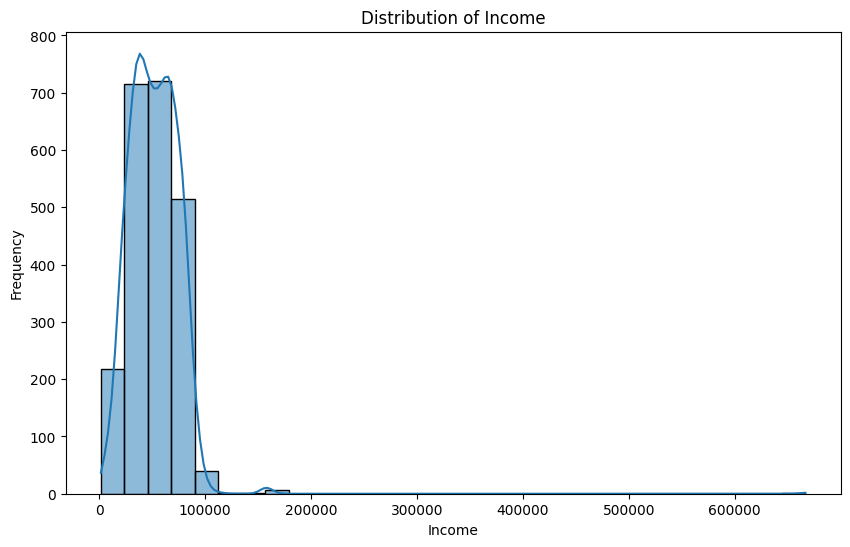

In [117]:
# Distribution of Income
plt.figure(figsize=(10, 6))
sns.histplot(df['Income'], kde=True, bins=30)
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

<ipython-input-118-b03af476ff4a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x='Education', data=df, palette='viridis')


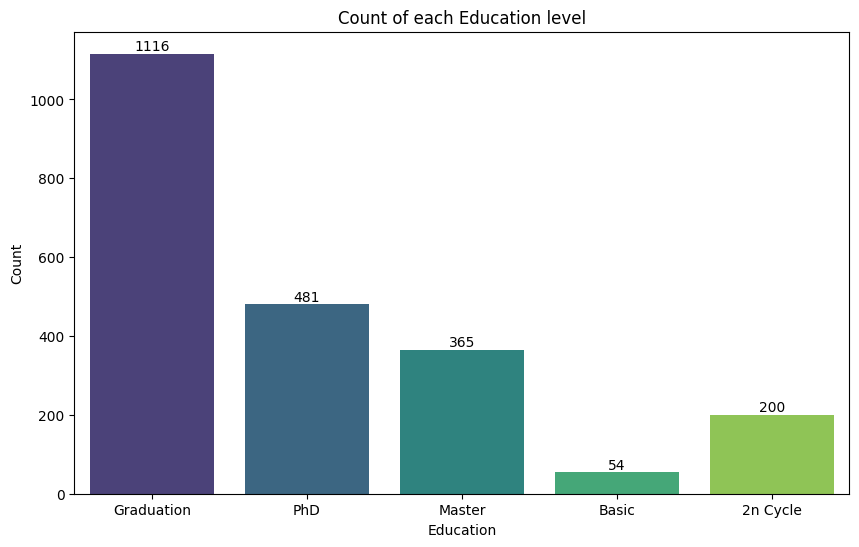

In [118]:
plt.figure(figsize=(10, 6))
ax=sns.countplot(x='Education', data=df, palette='viridis')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count of each Education level')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()

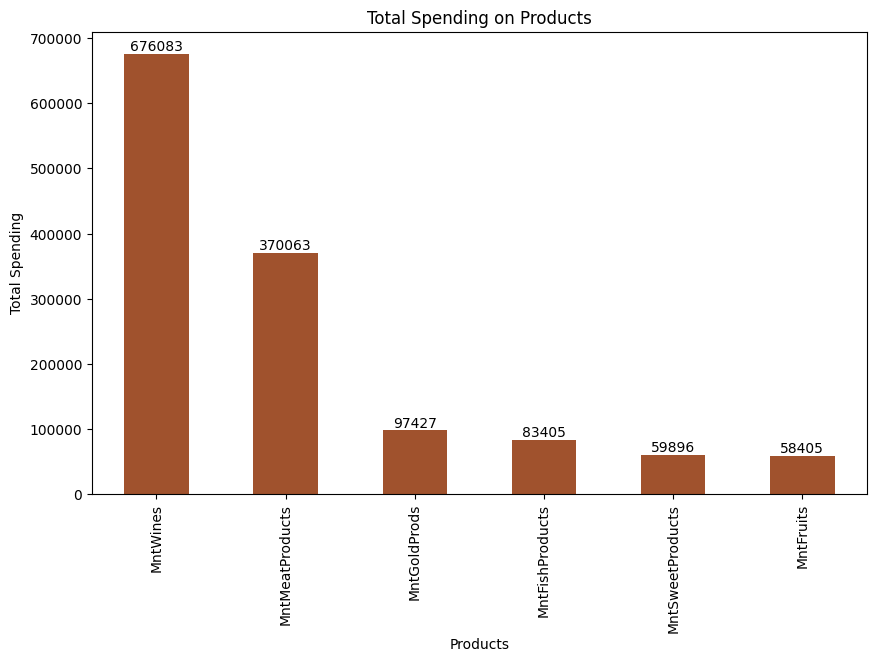

In [119]:
products = ['MntWines', 'MntMeatProducts', 'MntGoldProds', 'MntFishProducts', 'MntSweetProducts', 'MntFruits' ]
total_spent = df[products].sum()
plt.figure(figsize=(10,6))
ax=total_spent.plot(kind='bar', color='sienna')
ax.bar_label(ax.containers[0], label_type='edge', fmt='%.0f')
plt.title('Total Spending on Products')
plt.xlabel('Products')
plt.ylabel('Total Spending')
plt.show()

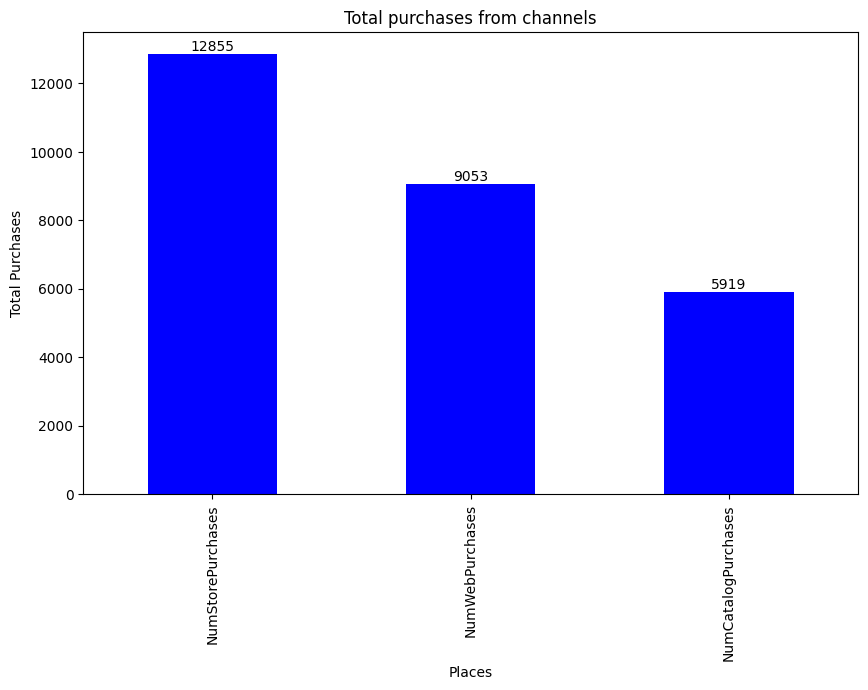

In [120]:
places = ['NumStorePurchases','NumWebPurchases', 'NumCatalogPurchases']
type_of_place = df[places].sum()
plt.figure(figsize=(10,6))
ax=type_of_place.plot(kind='bar', color='blue')
ax.bar_label(ax.containers[0], label_type='edge', fmt='%.0f')
plt.title('Total purchases from channels')
plt.xlabel('Places')
plt.ylabel('Total Purchases')
plt.show()

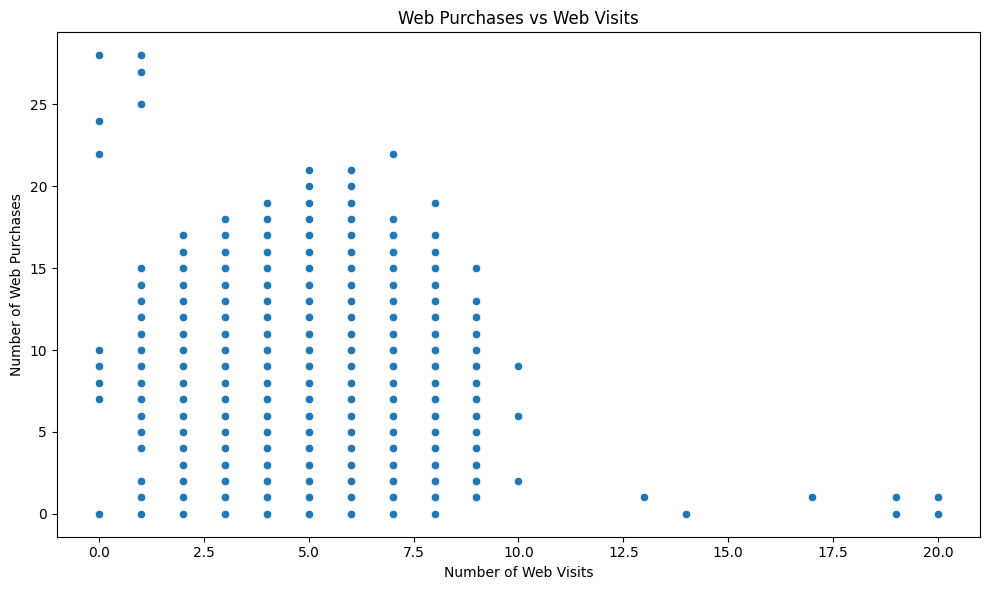

In [121]:
df['WebPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases']
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='NumWebVisitsMonth', y='WebPurchases')
plt.title('Web Purchases vs Web Visits')
plt.xlabel('Number of Web Visits')
plt.ylabel('Number of Web Purchases')
plt.tight_layout()
plt.show()

<ipython-input-122-982c1dbb14f4>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  spending_by_age = df.groupby('Age_Group')[products].mean()


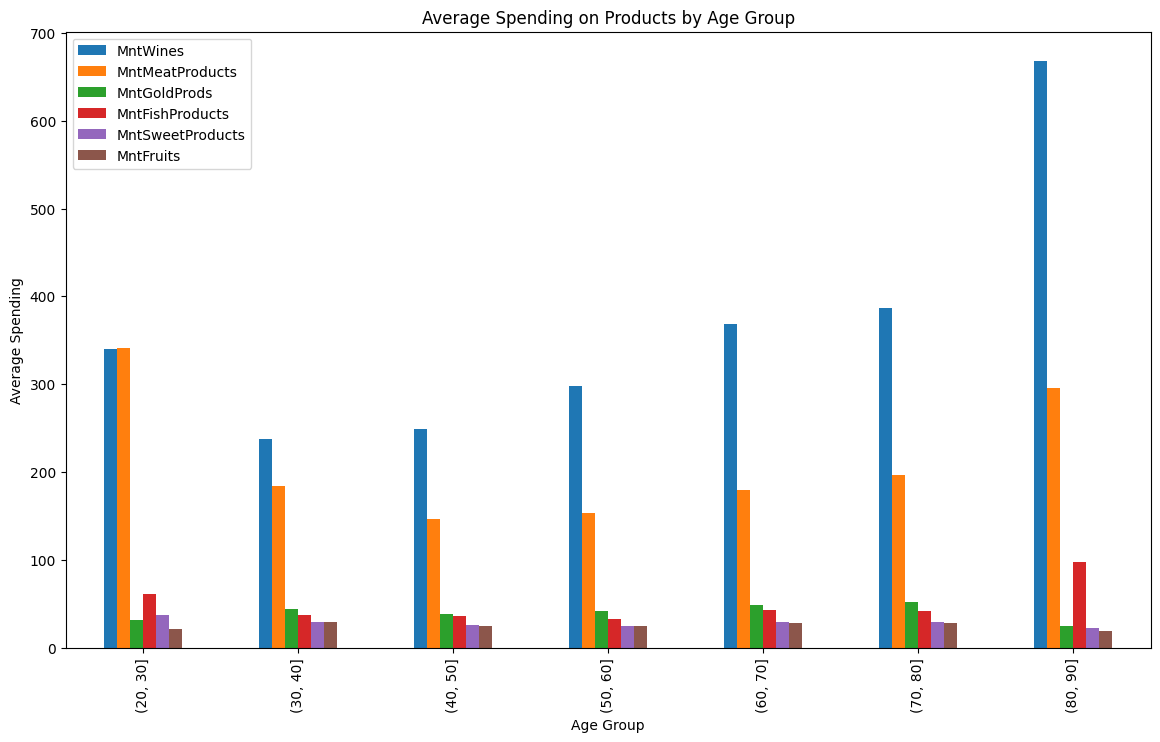

In [122]:
df['Age'] = 2024 - df['Year_Birth']
age_bins = [20, 30, 40, 50, 60, 70, 80, 90]
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins)

spending_by_age = df.groupby('Age_Group')[products].mean()
spending_by_age.plot(kind='bar', figsize=(14,8))
plt.title('Average Spending on Products by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Spending')
plt.show()

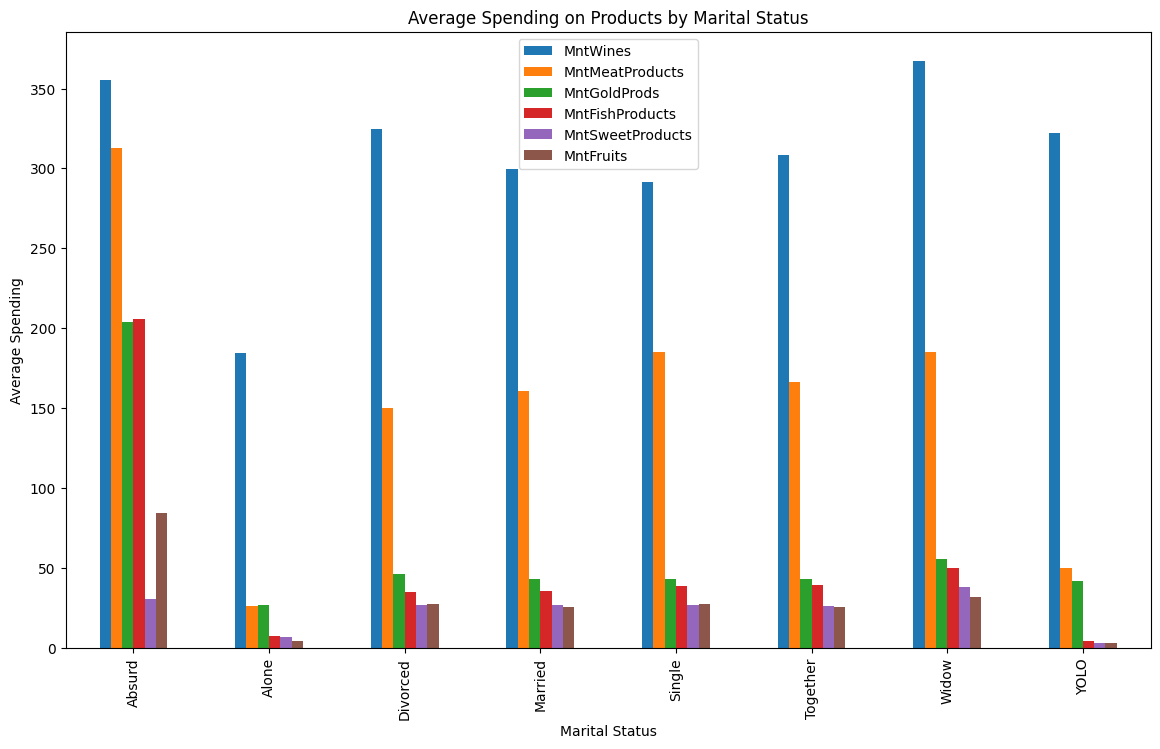

In [123]:
spending_by_marital_status = df.groupby('Marital_Status')[products].mean()
spending_by_marital_status.plot(kind='bar', figsize=(14,8))
plt.title('Average Spending on Products by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Average Spending')
plt.show()

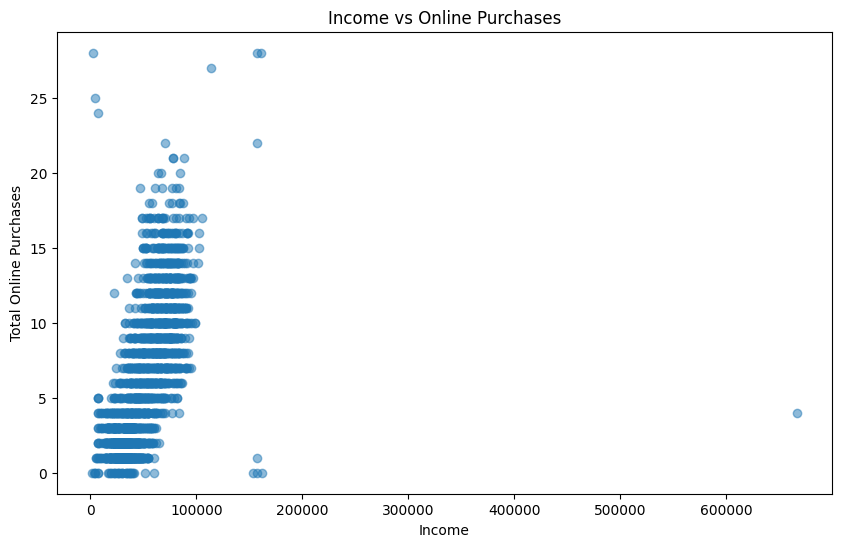

In [124]:
df['Total_Online_Purchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases']
df['Total_Store_Purchases'] = df['NumStorePurchases']

plt.figure(figsize=(10,6))
plt.scatter(df['Income'], df['Total_Online_Purchases'], alpha=0.5)
plt.title('Income vs Online Purchases')
plt.xlabel('Income')
plt.ylabel('Total Online Purchases')
plt.show()

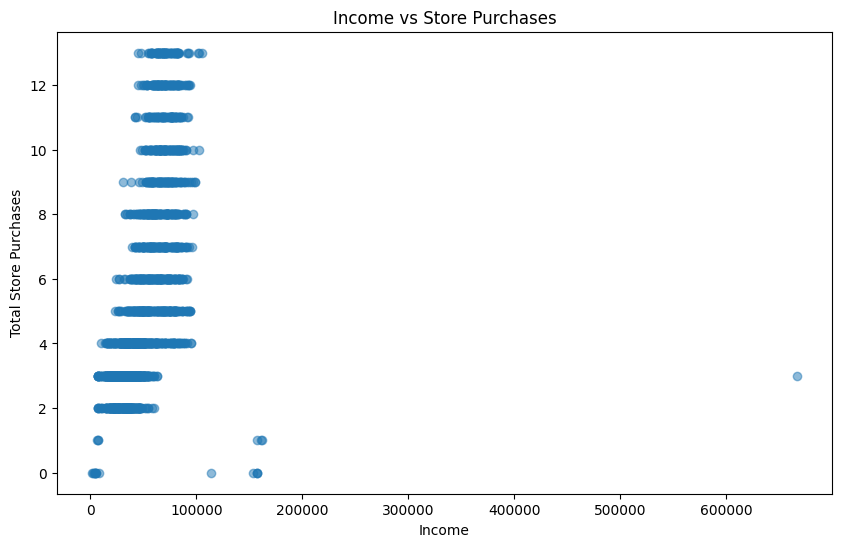

In [125]:
plt.figure(figsize=(10,6))
plt.scatter(df['Income'], df['Total_Store_Purchases'], alpha=0.5)
plt.title('Income vs Store Purchases')
plt.xlabel('Income')
plt.ylabel('Total Store Purchases')
plt.show()

The comparison shows majority prefering the online route of purchase rather than visiting the store.

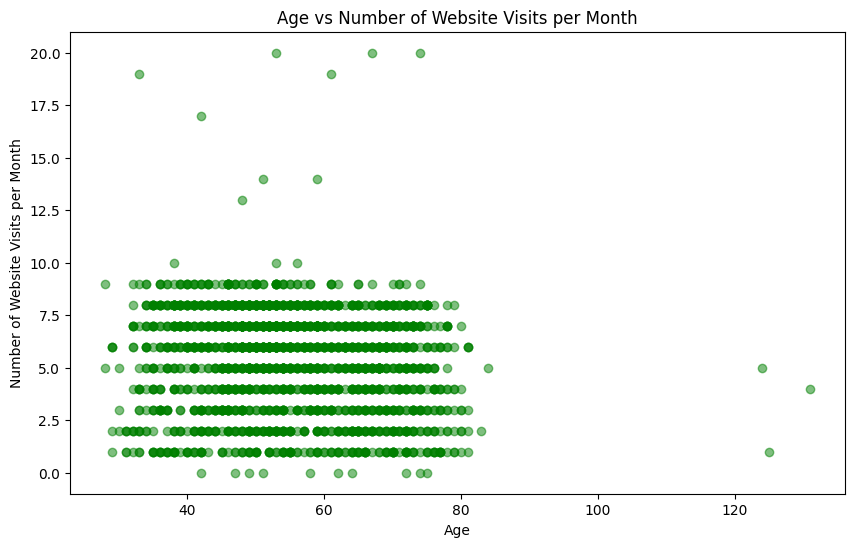

In [126]:
plt.figure(figsize=(10,6))
plt.scatter(df['Age'], df['NumWebVisitsMonth'], alpha=0.5, color='green')
plt.title('Age vs Number of Website Visits per Month')
plt.xlabel('Age')
plt.ylabel('Number of Website Visits per Month')
plt.show()

<ipython-input-127-a9859ac8514e>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  response_by_age_group = df.groupby('Age_Group')[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].mean()


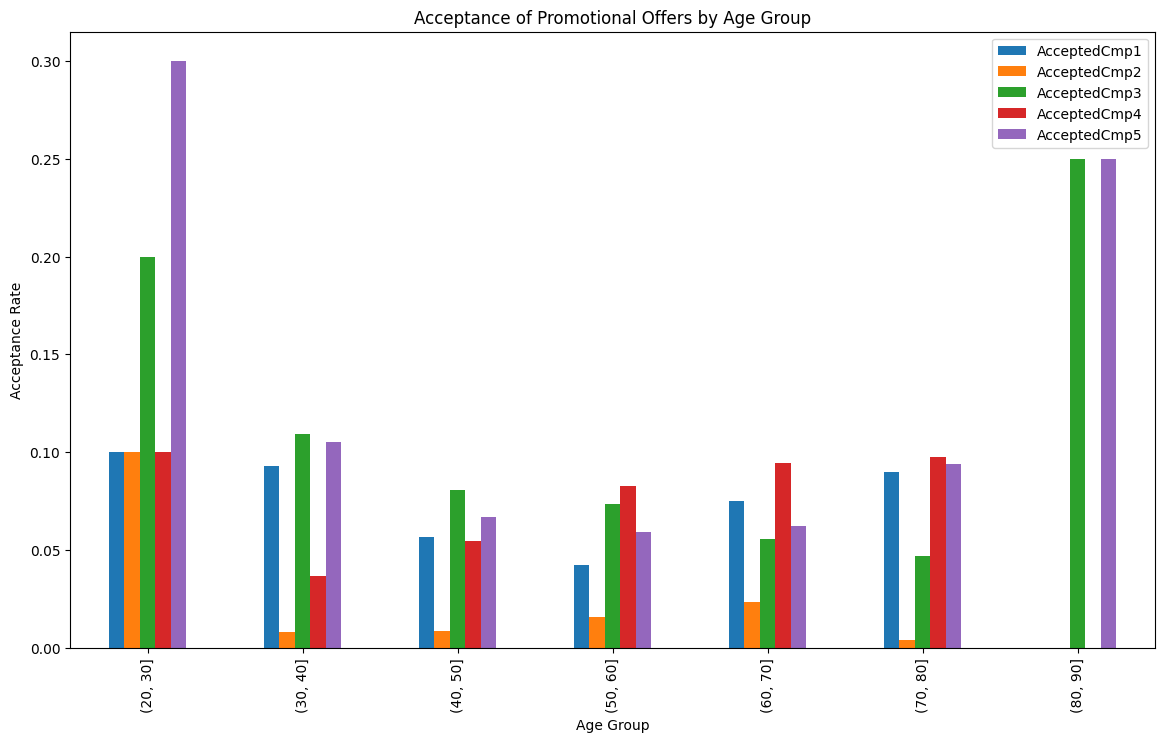

In [127]:
response_by_age_group = df.groupby('Age_Group')[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].mean()
response_by_age_group.plot(kind='bar', figsize=(14,8))
plt.title('Acceptance of Promotional Offers by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Acceptance Rate')
plt.show()

In [148]:
# Dropping unnecessary features for clustering
df.drop('Kidhome', axis = 1, inplace= True)
df.drop('Teenhome', axis = 1, inplace= True)
df.drop('Recency', axis = 1, inplace= True)
df.drop('Complain', axis = 1, inplace= True)
df.drop('AcceptedCmp1', axis = 1, inplace= True)
df.drop('AcceptedCmp2', axis = 1, inplace= True)
df.drop('AcceptedCmp3', axis = 1, inplace= True)
df.drop('AcceptedCmp4', axis = 1, inplace= True)
df.drop('AcceptedCmp5', axis = 1, inplace= True)
df.drop('Response', axis = 1, inplace= True)
df.drop('Z_CostContact', axis = 1, inplace= True)
df.drop('Z_Revenue', axis = 1, inplace= True)
df.drop('Dt_Customer', axis = 1, inplace= True)
df.drop('Year_Birth', axis = 1, inplace = True)
df.drop('Education', axis = 1, inplace = True)
df.drop('Marital_Status', axis = 1, inplace = True)
df.drop('NumWebVisitsMonth', axis = 1, inplace = True)
df.head()

Income  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0   58138       635         88              546              172   
1   46344        11          1                6                2   
2   71613       426         49              127              111   
3   26646        11          4               20               10   
4   58293       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  
0                   10                  4  
1                    1                  2  
2                    2                 10  
3                    0                  4  
4                    3                  6

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Income                  2216 non-null   int64
 1   MntWines                2216 non-null   int64
 2   MntFruits               2216 non-null   int64
 3   MntMeatProducts         2216 non-null   int64
 4   MntFishProducts         2216 non-null   int64
 5   MntSweetProducts        2216 non-null   int64
 6   MntGoldProds            2216 non-null   int64
 7   NumDealsPurchases       2216 non-null   int64
 8   NumWebPurchases         2216 non-null   int64
 9   NumCatalogPurchases     2216 non-null   int64
 10  NumStorePurchases       2216 non-null   int64
 11  Total_Online_Purchases  2216 non-null   int64
 12  Total_Store_Purchases   2216 non-null   int64
dtypes: int64(13)
memory usage: 242.4 KB


Income  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0   58138       635         88              546              172   
1   46344        11          1                6                2   
2   71613       426         49              127              111   
3   26646        11          4               20               10   
4   58293       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  
0                   10                  4  
1                    1                  2  
2                    2                 10  
3                    0                  4  
4                    3                  6

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Income               2216 non-null   int64
 1   MntWines             2216 non-null   int64
 2   MntFruits            2216 non-null   int64
 3   MntMeatProducts      2216 non-null   int64
 4   MntFishProducts      2216 non-null   int64
 5   MntSweetProducts     2216 non-null   int64
 6   MntGoldProds         2216 non-null   int64
 7   NumDealsPurchases    2216 non-null   int64
 8   NumWebPurchases      2216 non-null   int64
 9   NumCatalogPurchases  2216 non-null   int64
 10  NumStorePurchases    2216 non-null   int64
dtypes: int64(11)
memory usage: 207.8 KB


In [43]:
# Normalization function

scaler = StandardScaler()
scaled_data_df = scaler.fit_transform(df.iloc[:,1:])

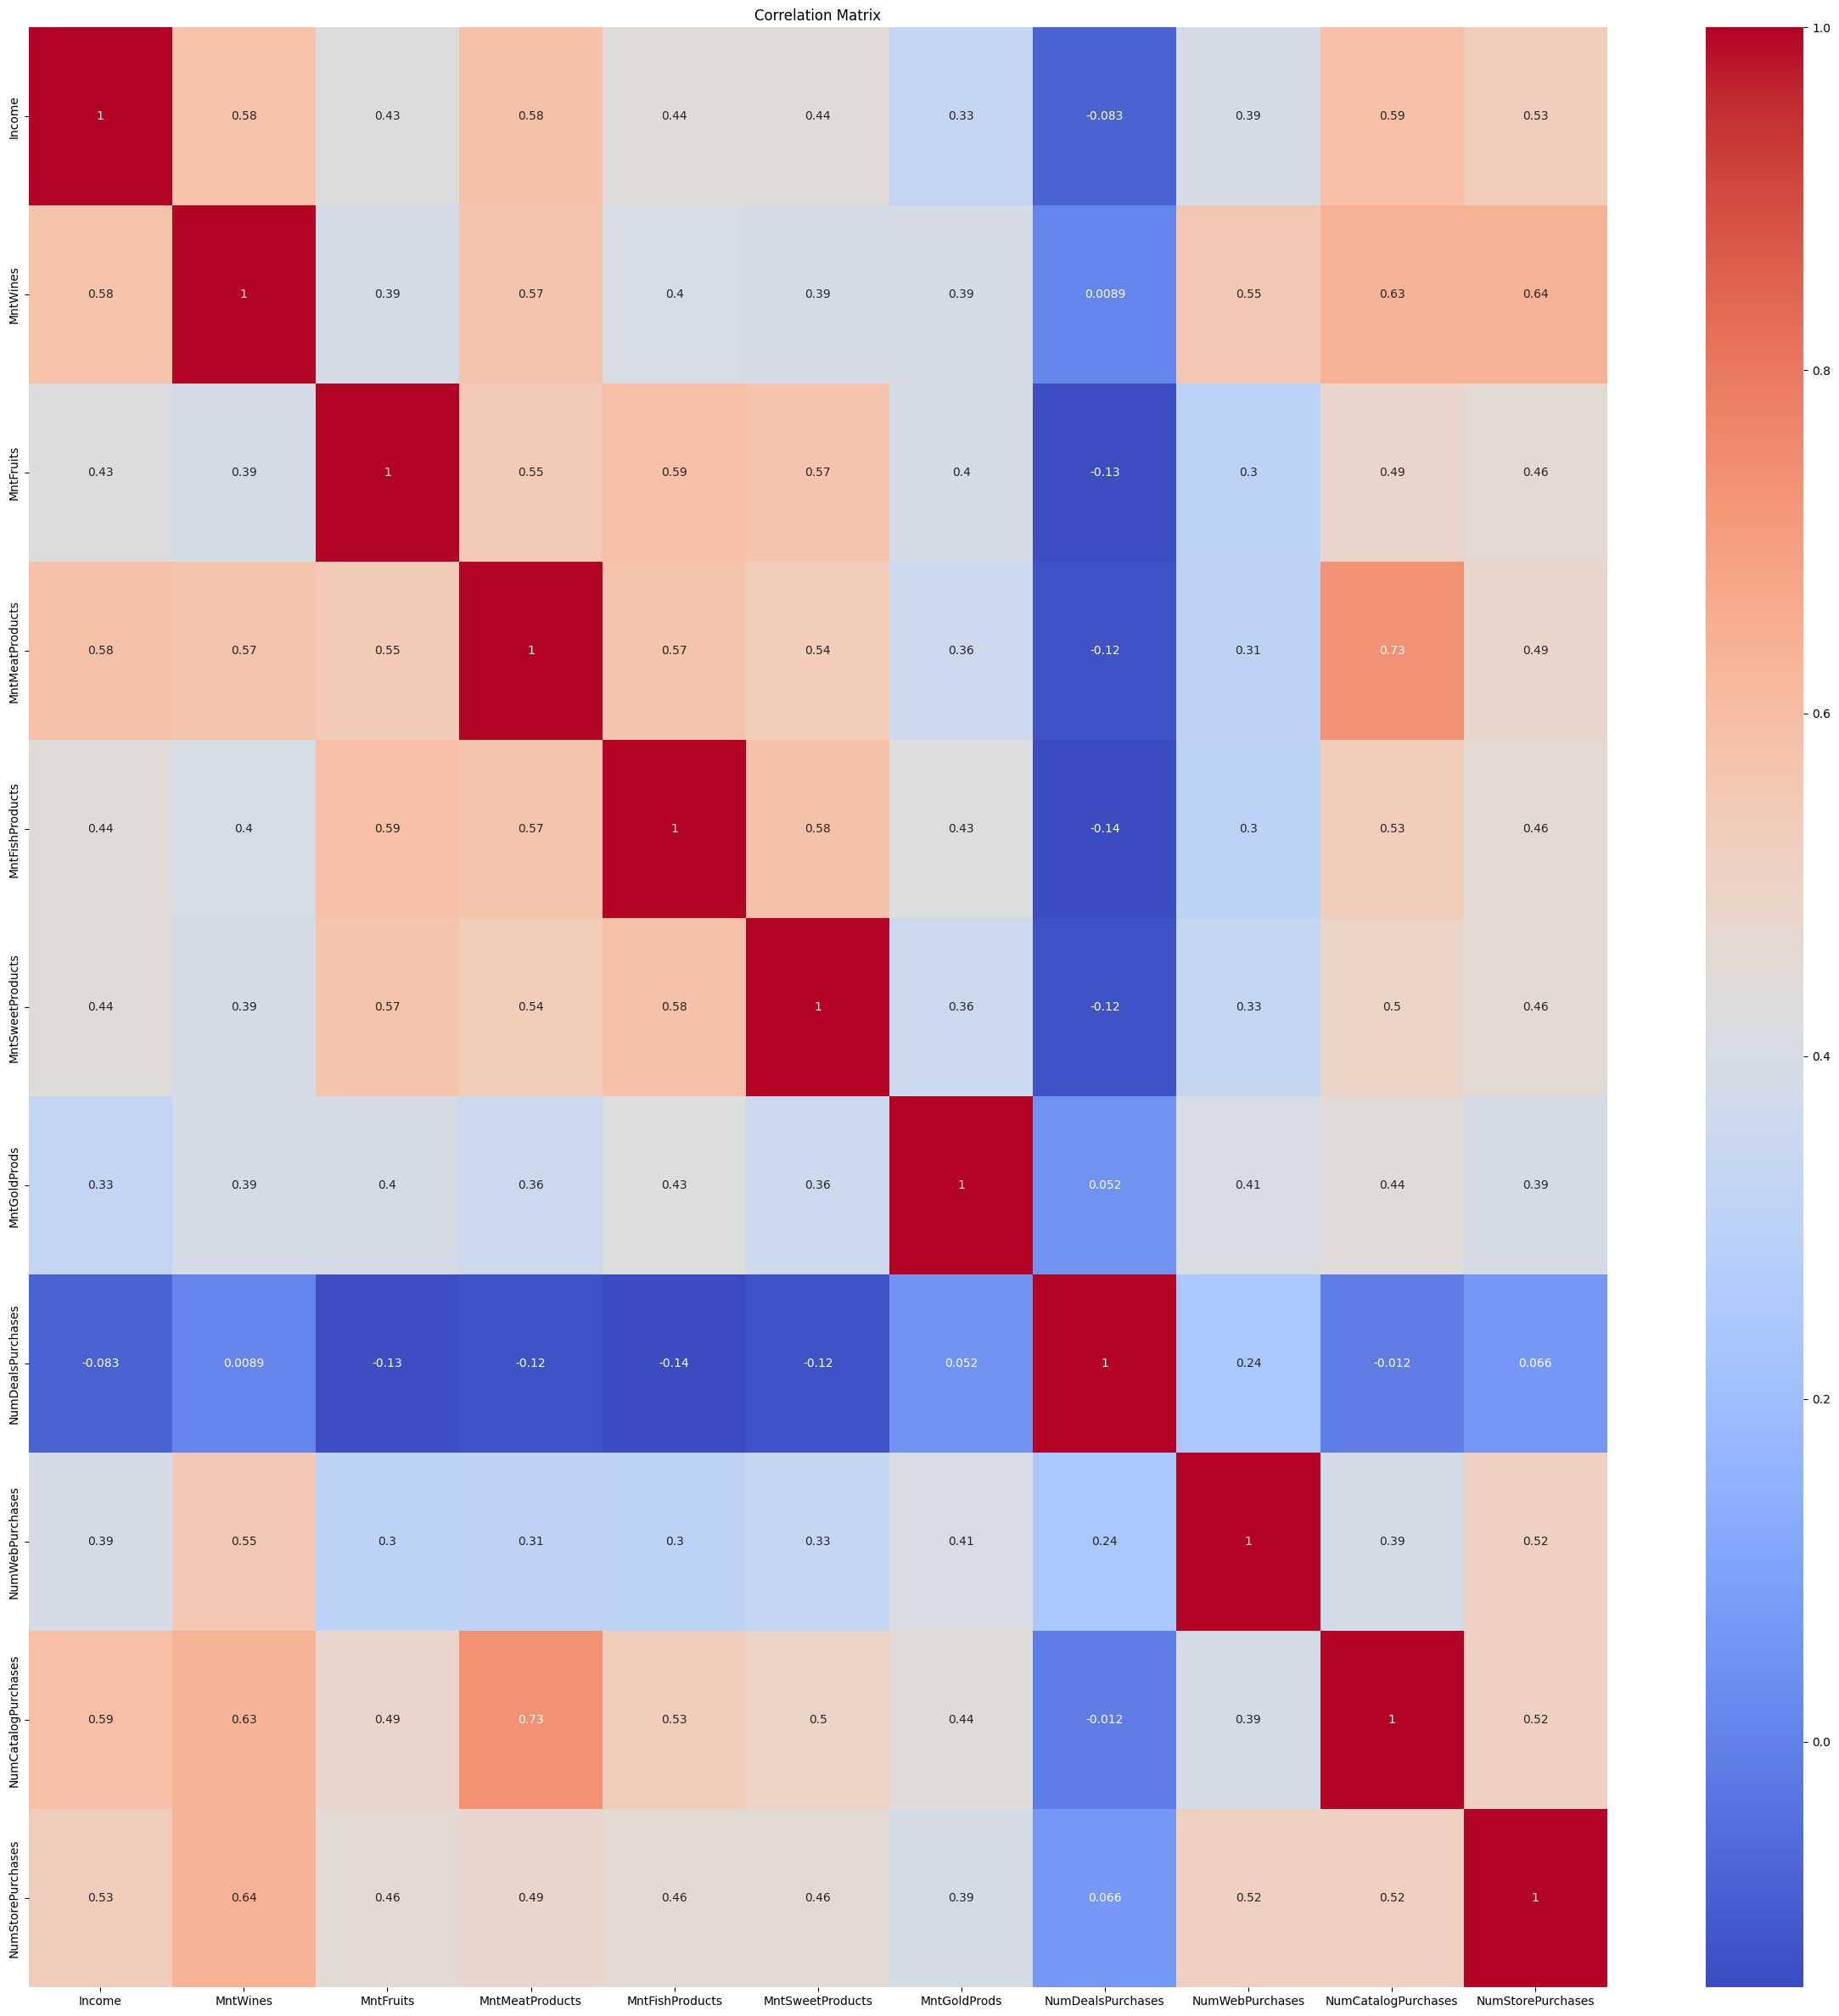

In [44]:
plt.figure(figsize=(30, 30))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

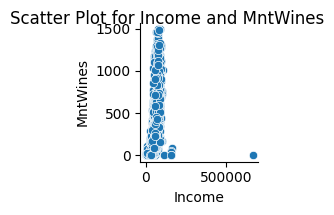

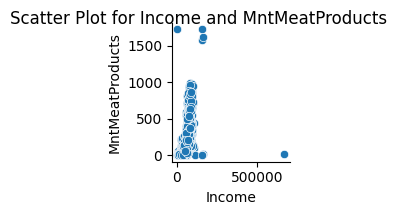

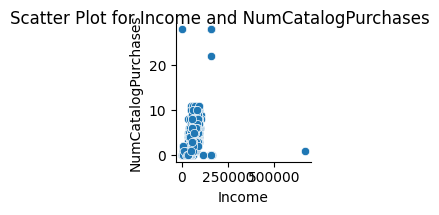

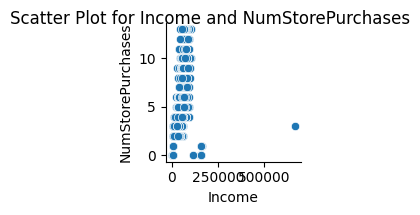

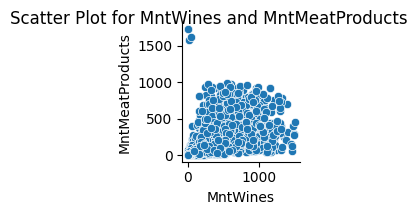

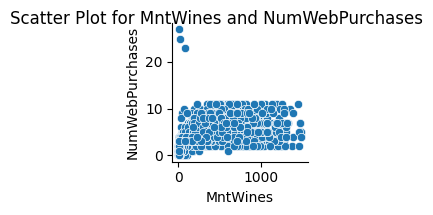

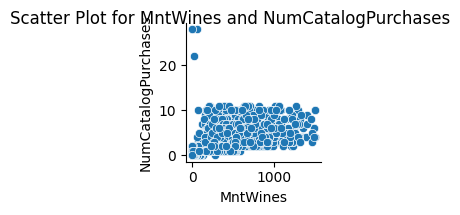

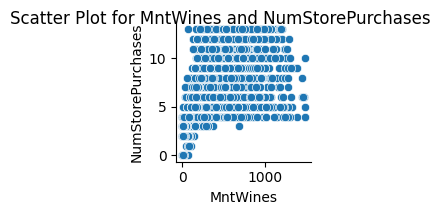

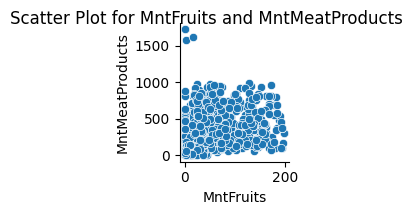

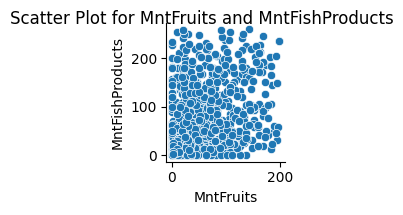

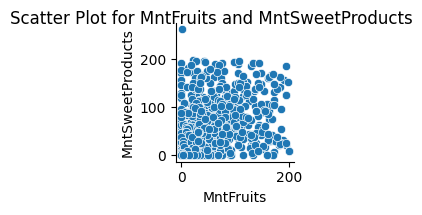

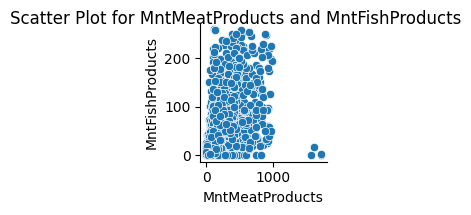

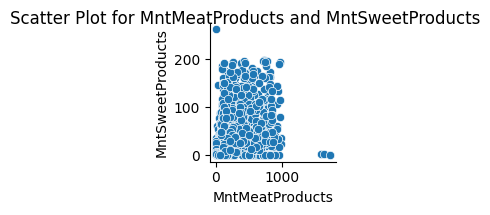

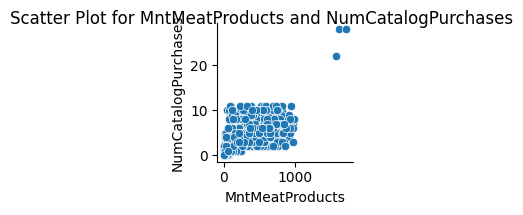

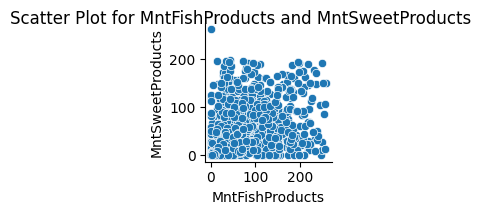

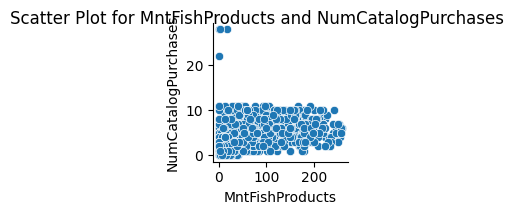

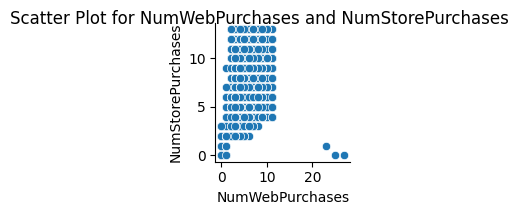

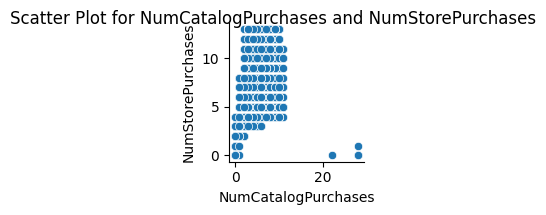

In [46]:
# Find pairs of columns with correlation greater than 0.50or less than -0.5
high_corr_pairs = []
checked = set()
for col1 in df.columns:
    for col2 in df.columns:
        if col1 != col2 and abs(df.corr().loc[col1, col2]) > 0.5 and (col2, col1) not in checked:  # Use df.corr().loc for correlation access
            high_corr_pairs.append((col1, col2))
            checked.add((col1, col2))

# scatter plot matrix for the selected pairs
for pair in high_corr_pairs:
    sns.pairplot(df, height=2, x_vars=pair[0], y_vars=pair[1], kind='scatter')
    plt.suptitle(f'Scatter Plot for {pair[0]} and {pair[1]}', y=1.02)
    plt.show()

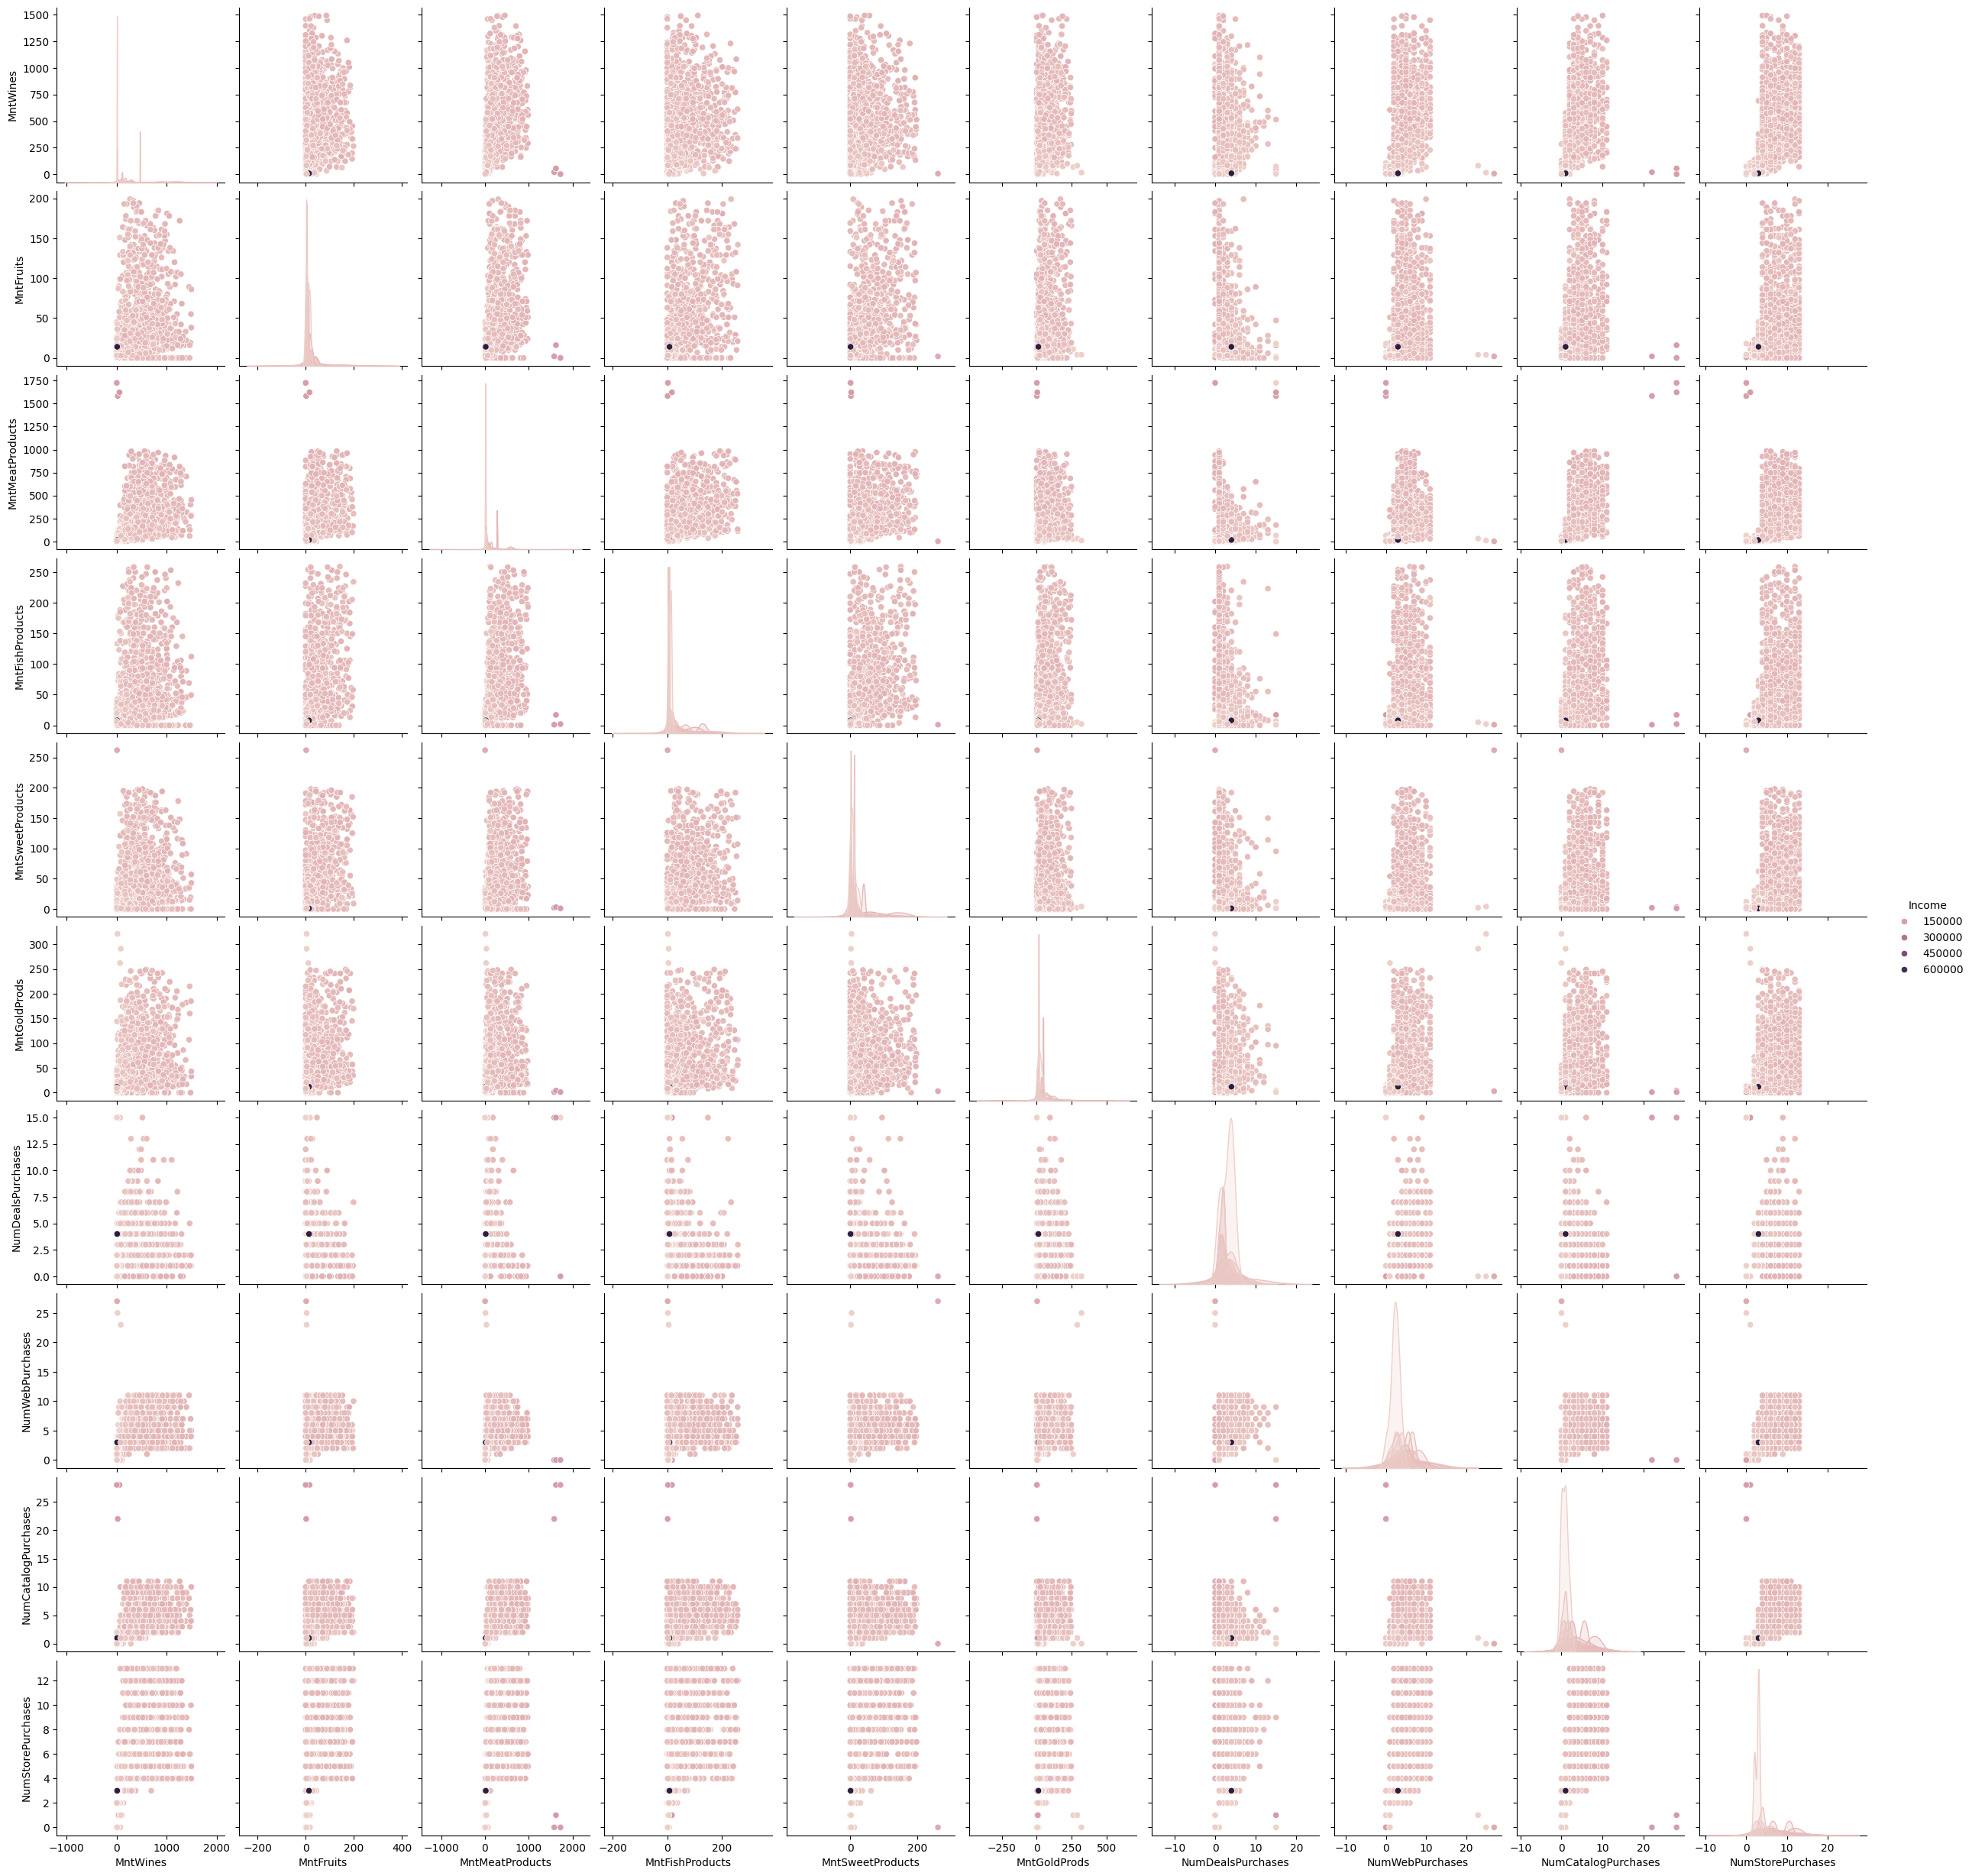

In [47]:
sns.pairplot(df, hue='Income')
plt.show()

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Income               2216 non-null   int64
 1   MntWines             2216 non-null   int64
 2   MntFruits            2216 non-null   int64
 3   MntMeatProducts      2216 non-null   int64
 4   MntFishProducts      2216 non-null   int64
 5   MntSweetProducts     2216 non-null   int64
 6   MntGoldProds         2216 non-null   int64
 7   NumDealsPurchases    2216 non-null   int64
 8   NumWebPurchases      2216 non-null   int64
 9   NumCatalogPurchases  2216 non-null   int64
 10  NumStorePurchases    2216 non-null   int64
dtypes: int64(11)
memory usage: 207.8 KB


In [149]:
Customer_Analysis = df[['NumStorePurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumDealsPurchases']]

In [150]:
Clus_dataset = Customer_Analysis

In [151]:
Clus_dataset = np.nan_to_num(Clus_dataset)
Clus_dataset = np.array(Clus_dataset, dtype=np.float64)
Clus_dataset = StandardScaler().fit_transform(Clus_dataset)

db = DBSCAN(eps=0.5, min_samples=4).fit(Clus_dataset)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
Customer_Analysis["Clus_Db"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels))

print(Customer_Analysis[['NumStorePurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumDealsPurchases']].head())
print('Number of labels: ', set(labels))

   NumStorePurchases  NumWebPurchases  NumCatalogPurchases  NumDealsPurchases
0                  4                8                   10                  3
1                  2                1                    1                  2
2                 10                8                    2                  1
3                  4                2                    0                  2
4                  6                5                    3                  5
Number of labels:  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, -1}


<ipython-input-151-5bbd56e13180>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Customer_Analysis["Clus_Db"]=labels


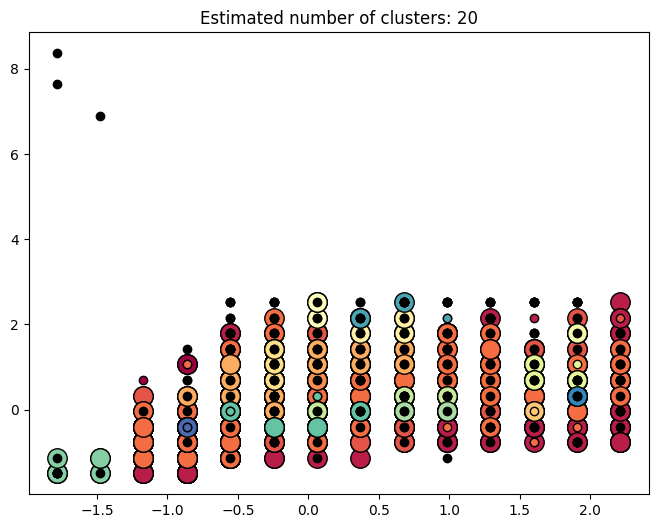

Number of Noise:  213


In [152]:
# DBSCAN Cluster for Customer Analysis

unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
        if k == -1:
                col = [0,0,0,1]
        class_member_mask = (labels == k)

        xy = Clus_dataset[class_member_mask & core_samples_mask]
        plt.plot(xy[:,0], xy[:,1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14)

        xy = Clus_dataset[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:,0], xy[:,1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % realClusterNum)
plt.show()
n_noise = list(labels).count(-1)
print('Number of Noise: ', n_noise)

In [153]:
for clust_number in set(labels):
    clust_set = Customer_Analysis[Customer_Analysis.Clus_Db == clust_number]
    if clust_number != -1:
        print("====","Cluster {}".format(clust_number), "====")
        print("Average Store Purchases: ", str(round(np.mean(clust_set['NumStorePurchases']))))
        print("Average Web Purchases: ", str(round(np.mean(clust_set['NumWebPurchases']))))
        print("Average Catalog Purchases: ", str(round(np.mean(clust_set['NumCatalogPurchases']))))
        print("Average Deals Purchases: ", str(round(np.mean(clust_set['NumDealsPurchases']))))
        print("Count: ", str(np.count_nonzero(clust_set.index)))
        print("--------------------------------------")

==== Cluster 0 ====
Average Store Purchases:  5
Average Web Purchases:  4
Average Catalog Purchases:  2
Average Deals Purchases:  2
Count:  459
--------------------------------------
==== Cluster 1 ====
Average Store Purchases:  6
Average Web Purchases:  3
Average Catalog Purchases:  3
Average Deals Purchases:  1
Count:  943
--------------------------------------
==== Cluster 2 ====
Average Store Purchases:  5
Average Web Purchases:  5
Average Catalog Purchases:  2
Average Deals Purchases:  5
Count:  52
--------------------------------------
==== Cluster 3 ====
Average Store Purchases:  6
Average Web Purchases:  5
Average Catalog Purchases:  2
Average Deals Purchases:  4
Count:  167
--------------------------------------
==== Cluster 4 ====
Average Store Purchases:  5
Average Web Purchases:  4
Average Catalog Purchases:  1
Average Deals Purchases:  3
Count:  255
--------------------------------------
==== Cluster 5 ====
Average Store Purchases:  5
Average Web Purchases:  7
Average Cata

In [154]:
Cust_purchase = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]

In [155]:
Clus_dataset1 = Cust_purchase

In [160]:
Clus_dataset1 = np.nan_to_num(Clus_dataset1)
Clus_dataset1 = np.array(Clus_dataset1, dtype=np.float64)
Clus_dataset1 = StandardScaler().fit_transform(Clus_dataset1)

db = DBSCAN(eps=0.5, min_samples=4).fit(Clus_dataset1)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels1 = db.labels_
Cust_purchase["Clus_Db1"]=labels1

realClusterNum=len(set(labels1)) - (1 if -1 in labels1 else 0)
clusterNum1 = len(set(labels1))

print(Cust_purchase[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].head())
print('Number of labels: ', set(labels1))

   MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0       635         88              546              172                88   
1        11          1                6                2                 1   
2       426         49              127              111                21   
3        11          4               20               10                 3   
4       173         43              118               46                27   

   MntGoldProds  
0            88  
1             6  
2            42  
3             5  
4            15  
Number of labels:  {0, 1, 2, -1}


<ipython-input-160-9bb68c65997e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cust_purchase["Clus_Db1"]=labels1


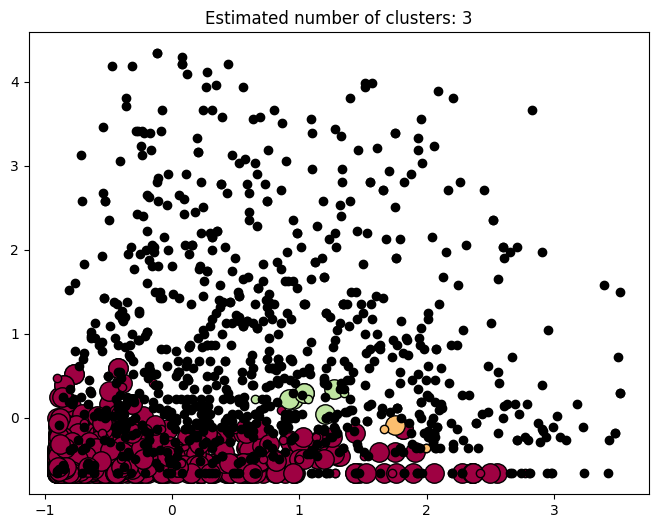

Number of Noise:  899


In [161]:
# DBSCAN Cluster for Customer Analysis

unique_labels1 = set(labels1)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels1))]

for k, col in zip(unique_labels1, colors):
        if k == -1:
                col = [0,0,0,1]
        class_member_mask = (labels1 == k)

        xy = Clus_dataset1[class_member_mask & core_samples_mask]
        plt.plot(xy[:,0], xy[:,1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14)

        xy = Clus_dataset1[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:,0], xy[:,1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % realClusterNum)
plt.show()
n_noise = list(labels1).count(-1)
print('Number of Noise: ', n_noise)

In [163]:
for clust_number1 in set(labels1):
    clust_set1 = Cust_purchase[Cust_purchase.Clus_Db1 == clust_number1]
    if clust_number1 != -1:
        print("====","Cluster {}".format(clust_number1), "====")
        print("Average Wine Amount: ", str(round(np.mean(clust_set1['MntWines']))))
        print("Average Fruits Amount: ", str(round(np.mean(clust_set1['MntFruits']))))
        print("Average Meat-products Amount: ", str(round(np.mean(clust_set1['MntMeatProducts']))))
        print("Average Fish-products Amount: ", str(round(np.mean(clust_set1['MntFishProducts']))))
        print("Average Sweet-products Amount: ", str(round(np.mean(clust_set1['MntSweetProducts']))))
        print("Average Gold-products Amount: ", str(round(np.mean(clust_set1['MntGoldProds']))))
        print("Count: ", str(np.count_nonzero(clust_set1.index)))
        print("--------------------------------------")

==== Cluster 0 ====
Average Wine Amount:  126
Average Fruits Amount:  5
Average Meat-products Amount:  36
Average Fish-products Amount:  7
Average Sweet-products Amount:  5
Average Gold-products Amount:  20
Count:  1303
--------------------------------------
==== Cluster 1 ====
Average Wine Amount:  929
Average Fruits Amount:  17
Average Meat-products Amount:  216
Average Fish-products Amount:  19
Average Sweet-products Amount:  14
Average Gold-products Amount:  95
Count:  4
--------------------------------------
==== Cluster 2 ====
Average Wine Amount:  669
Average Fruits Amount:  34
Average Meat-products Amount:  157
Average Fish-products Amount:  58
Average Sweet-products Amount:  26
Average Gold-products Amount:  35
Count:  10
--------------------------------------
